In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [6]:
df.shape

(42, 2)

In [7]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


# Visualization

<Axes: >

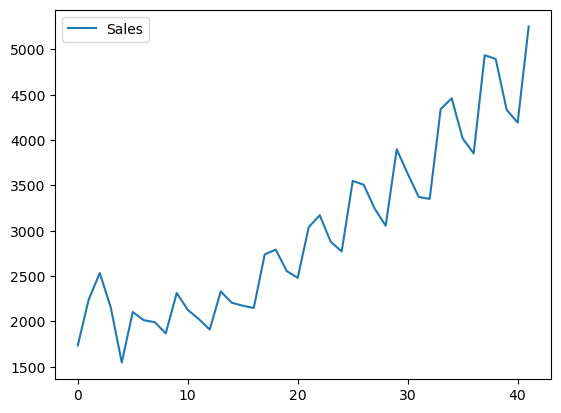

In [8]:
df.plot()

<Axes: >

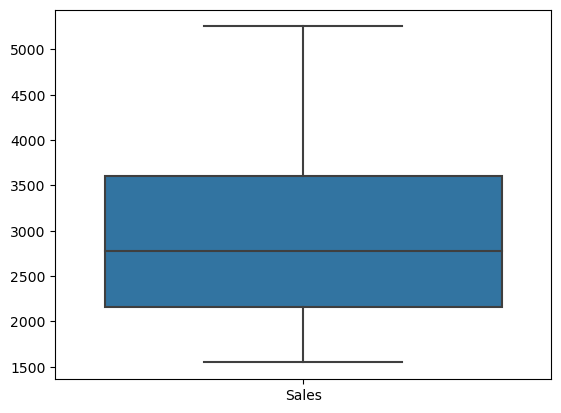

In [9]:
import seaborn as sns
sns.boxplot(data =df)

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

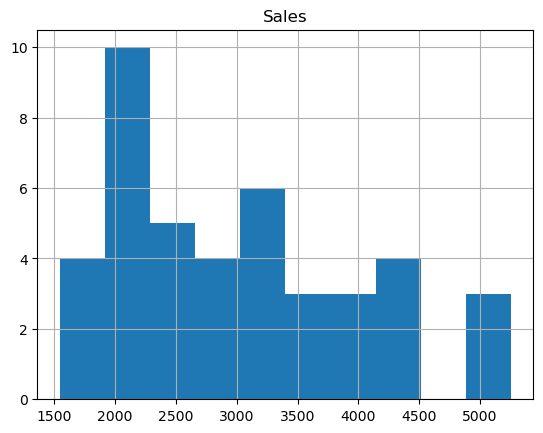

In [10]:
df.hist()

<Axes: ylabel='Density'>

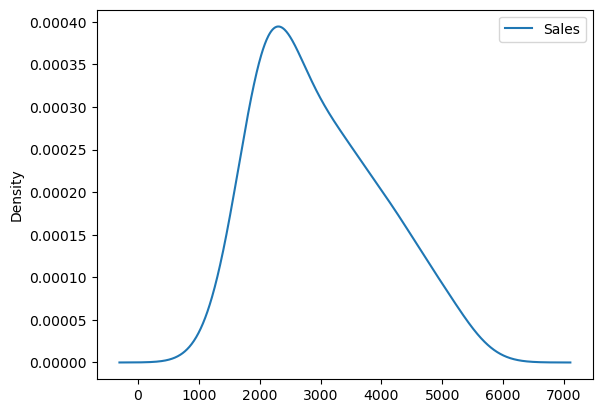

In [11]:
df.plot(kind ='kde')

In [12]:
np.array(df['Sales'])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

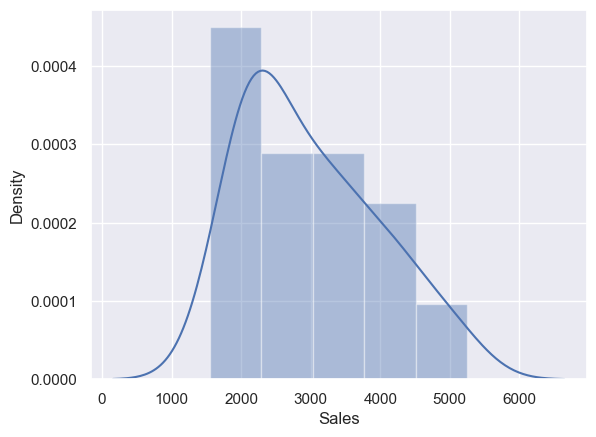

In [13]:
sns.set_theme()
rk= sns.distplot(df['Sales'],kde=True)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

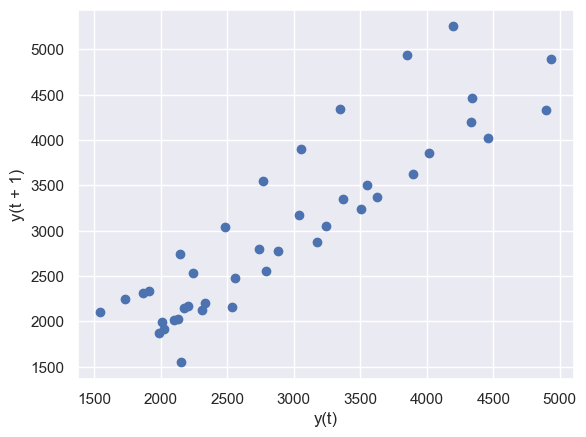

In [14]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])

# Data Preprocessing

In [15]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [16]:
len(df)

42

In [17]:
df['quarter']= 0
for i in range(42):
    p = df['Quarter'][i]
    df['quarter'][i] = p[0:2]

In [18]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [19]:
df_dummies= pd.DataFrame(pd.get_dummies(df['quarter'],columns =['Q1','Q2','Q3','Q4']))
df_dummies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [20]:
#Join the df and df_dummies table by using concat 

cc = pd.concat([df,df_dummies],axis = 1)

cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [21]:
cc['t'] =np.arange(1,43) # Define the range 
cc['t_squared'] = cc['t']**2
cc['Sales_log'] = np.log(df['Sales'])

In [22]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [23]:
train =cc.head(32)
test =cc.tail(10)

# Models

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
# Linear Model
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767115

In [26]:
#Quadratic Model
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.73573554072897

In [27]:
# Exponential model
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [28]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545
